In [225]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [165]:
# Importing datasets
 
wine_df= pd.read_csv(r"C:\Users\AA\DataScience\datasets\wine-clustering.csv")
wine_df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [220]:
wine_df.shape

(178, 13)

In [166]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [221]:
# Descriptive statistics of the `wine_data` dataset.
round(wine_df.describe(),2)

Alcohol  Malic_Acid     Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
count   178.00      178.00  178.00        178.00     178.00         178.00   
mean     13.00        2.34    2.37         19.49      99.74           2.30   
std       0.81        1.12    0.27          3.34      14.28           0.63   
min      11.03        0.74    1.36         10.60      70.00           0.98   
25%      12.36        1.60    2.21         17.20      88.00           1.74   
50%      13.05        1.87    2.36         19.50      98.00           2.36   
75%      13.68        3.08    2.56         21.50     107.00           2.80   
max      14.83        5.80    3.23         30.00     162.00           3.88   

       Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
count      178.00                178.00           178.00           178.00   
mean         2.03                  0.36             1.59             5.06   
std          1.00                  0.12             0.57             2.32   
min          0.34                  0.13             0.41             1.28   
25%          1.20                  0.27             1.25             3.22   
50%          2.13                  0.34             1.56             4.69   
75%          2.88                  0.44             1.95             6.20   
max          5.08                  0.66             3.58            13.00   

          Hue   OD280  Proline  
count  178.00  178.00   178.00  
mean     0.96    2.61   746.89  
std      0.23    0.71   314.91  
min      0.48    1.27   278.00  
25%      0.78    1.94   500.50  
50%      0.96    2.78   673.50  
75%      1.12    3.17   985.00  
max      1.71    4.00  1680.00

In [222]:
wine_df.duplicated().sum()

0

In [224]:
wine_df.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

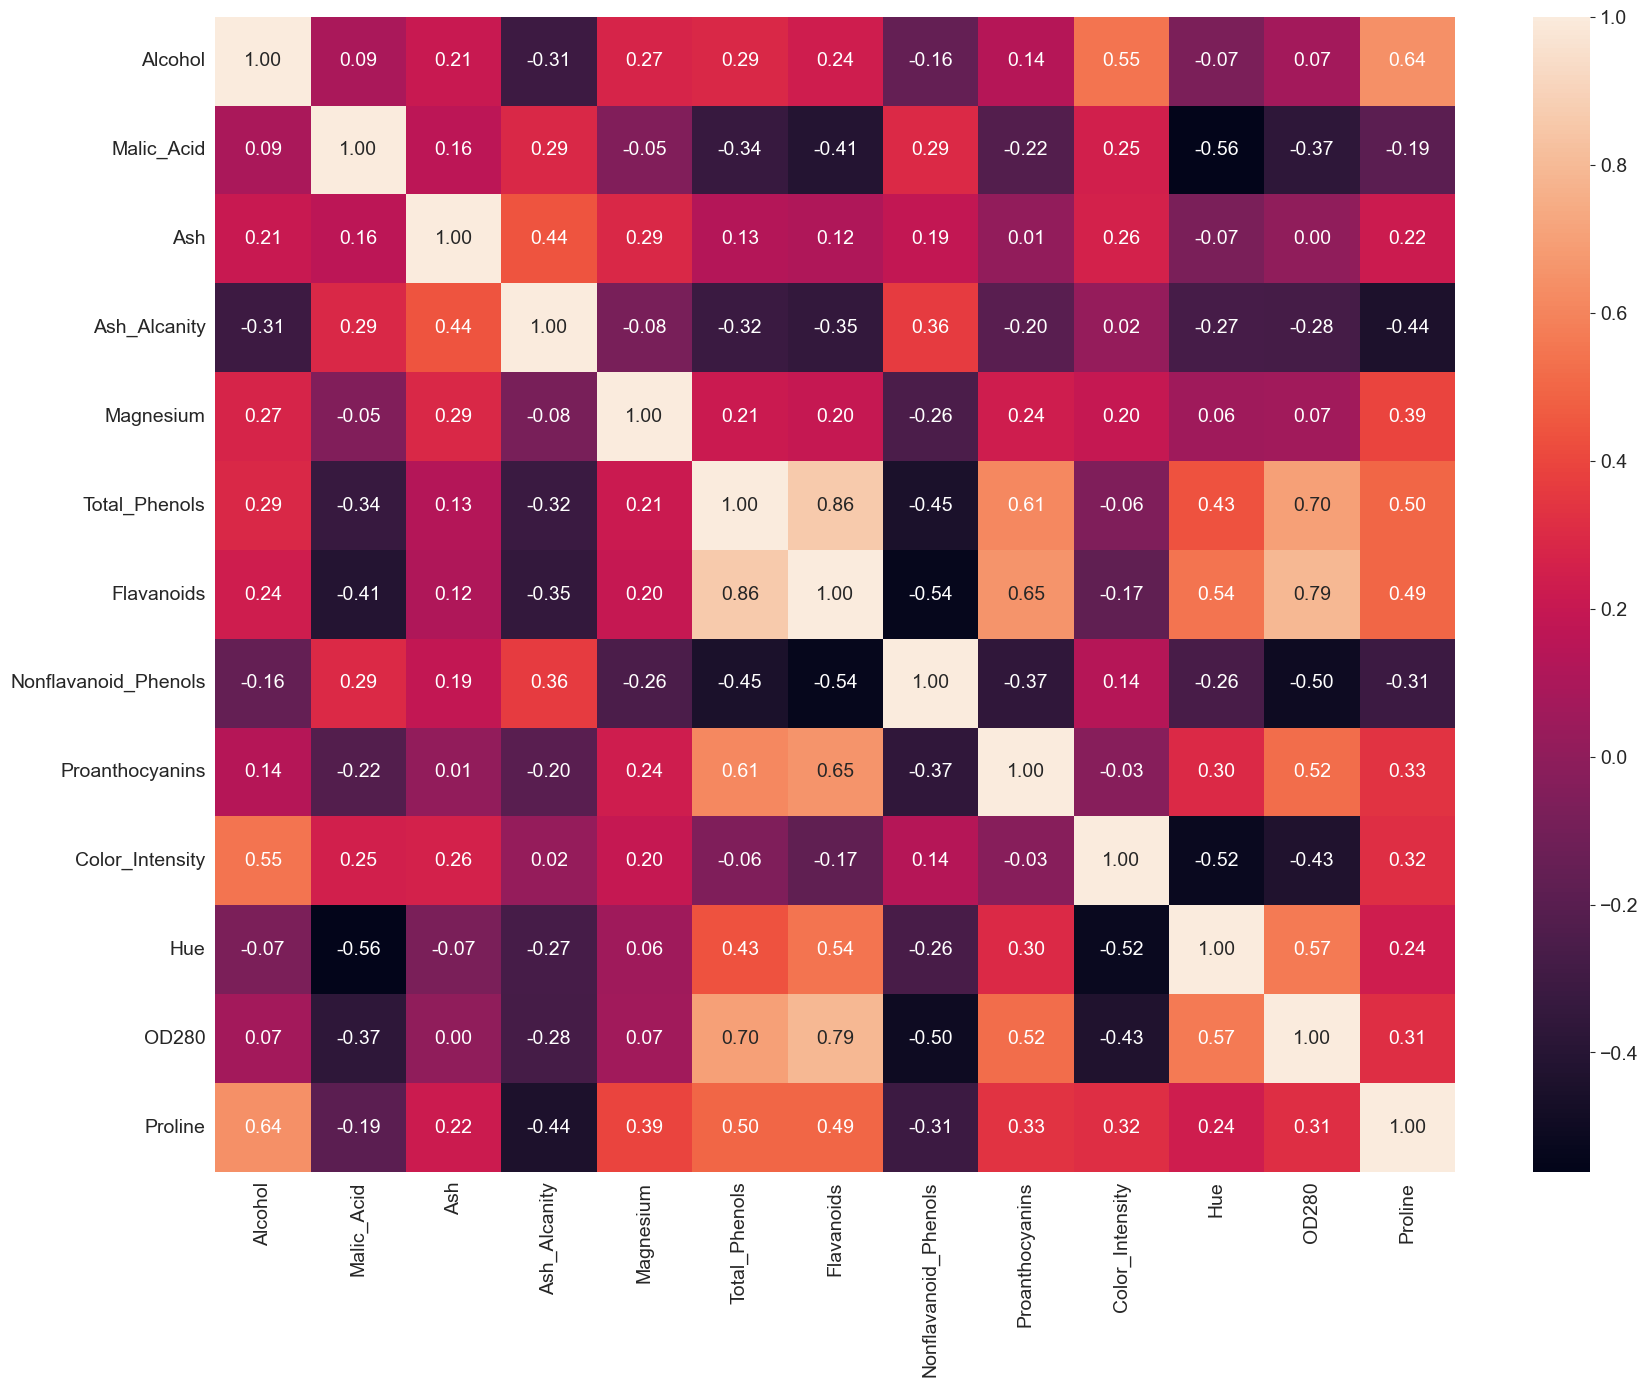

In [231]:
#Correlation analysis from HeatMap
plt.figure(figsize=(20,15))
correlation_matrix = wine_df.corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f")
plt.show()

Observation drawn are:

Proline is highly with correlated with different parameter than others in extreme terms.

Flavaniods is highly as well as positively correlated with Total_Phenols and OD280.

Strangely, Malic_Acid and Nonflavaniod_Phenols are negatively correlated with other parameter but slightly psoitively correlated with each other as they are not directly correlated substances.

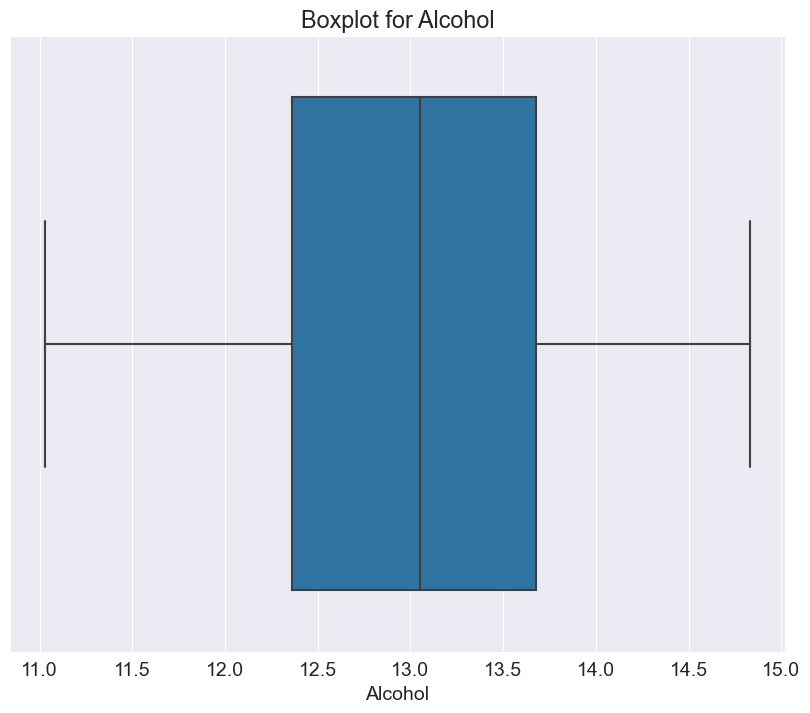

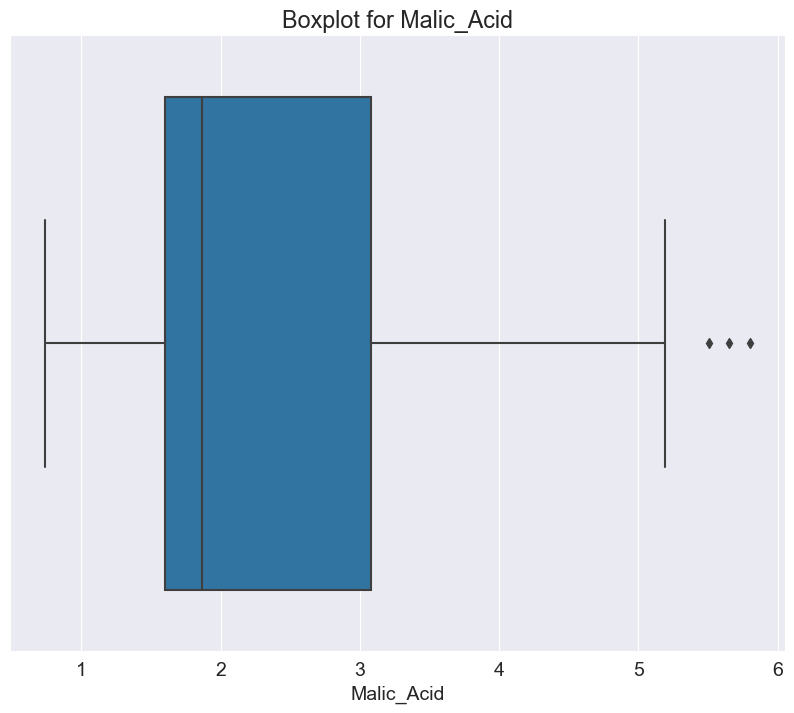

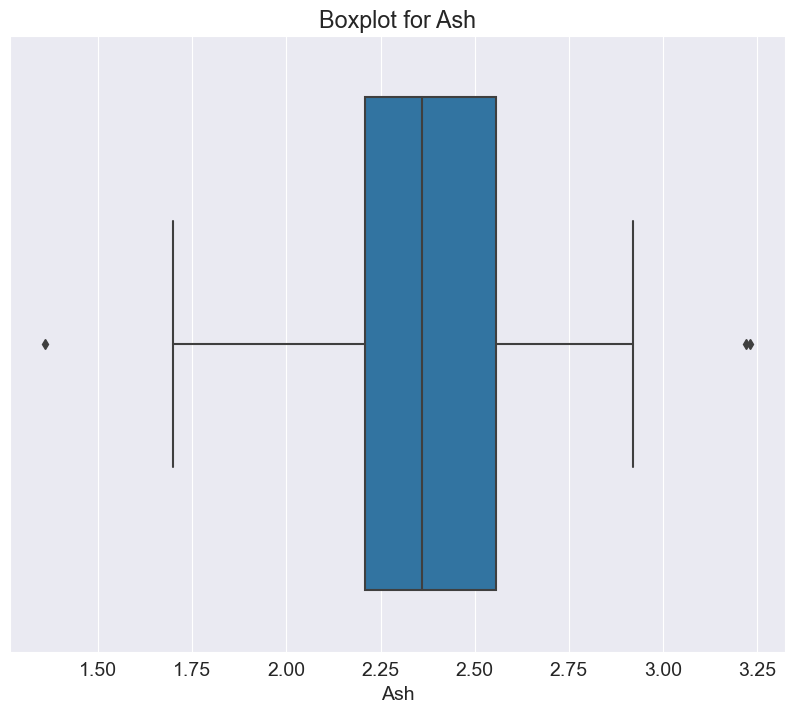

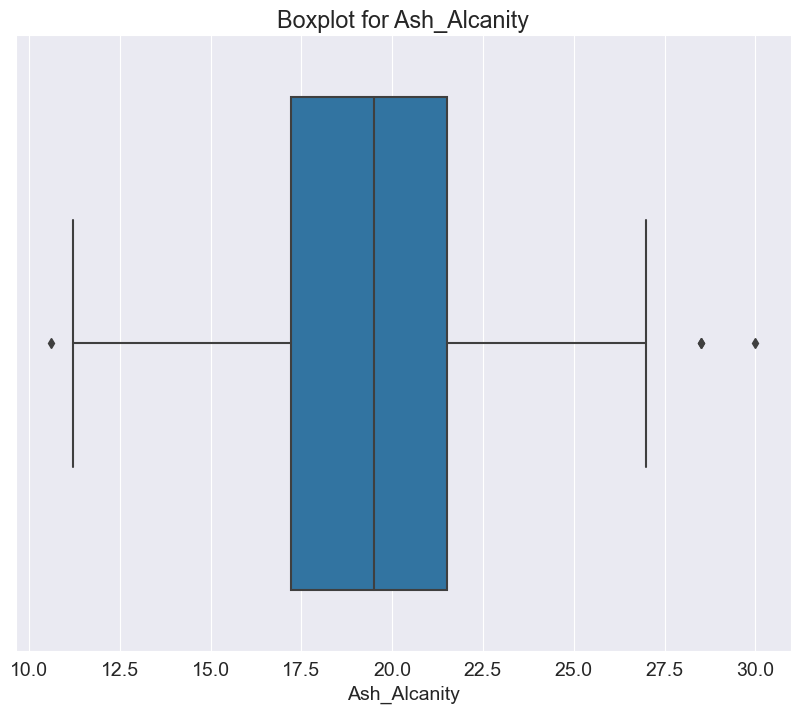

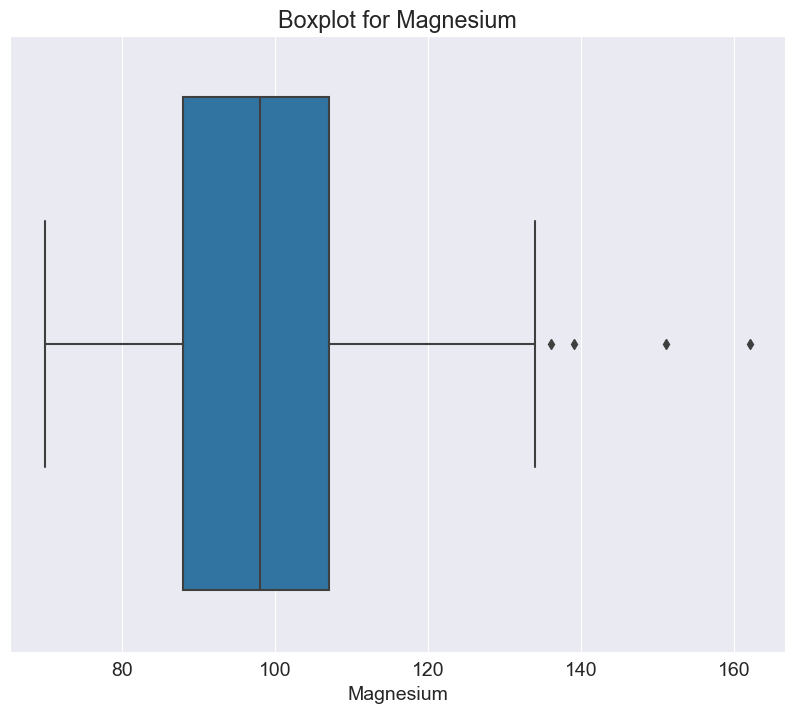

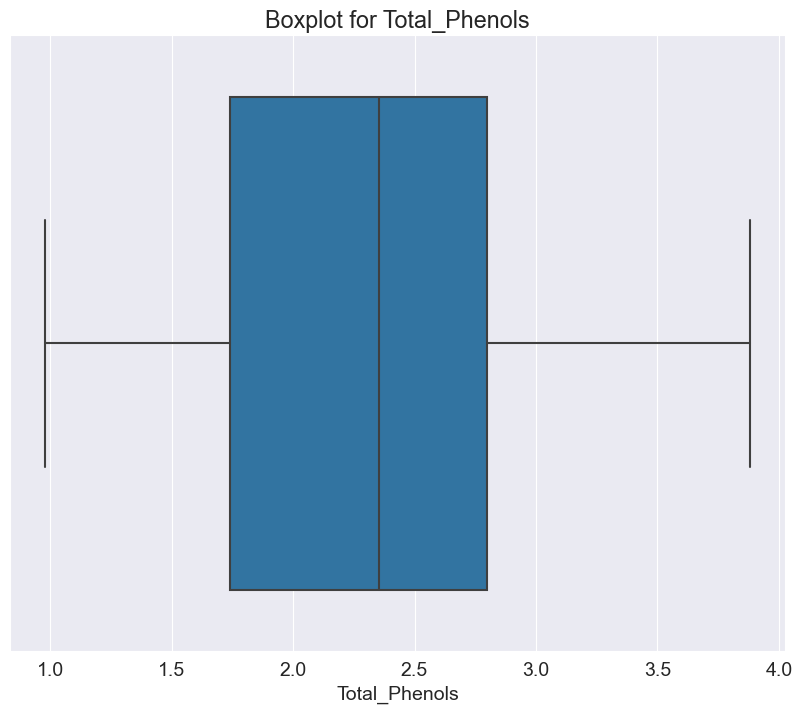

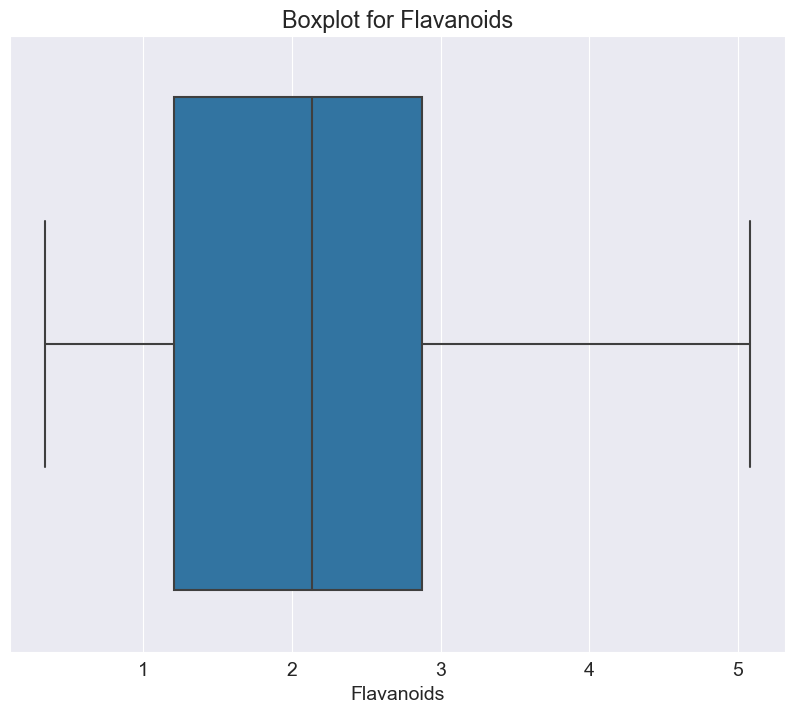

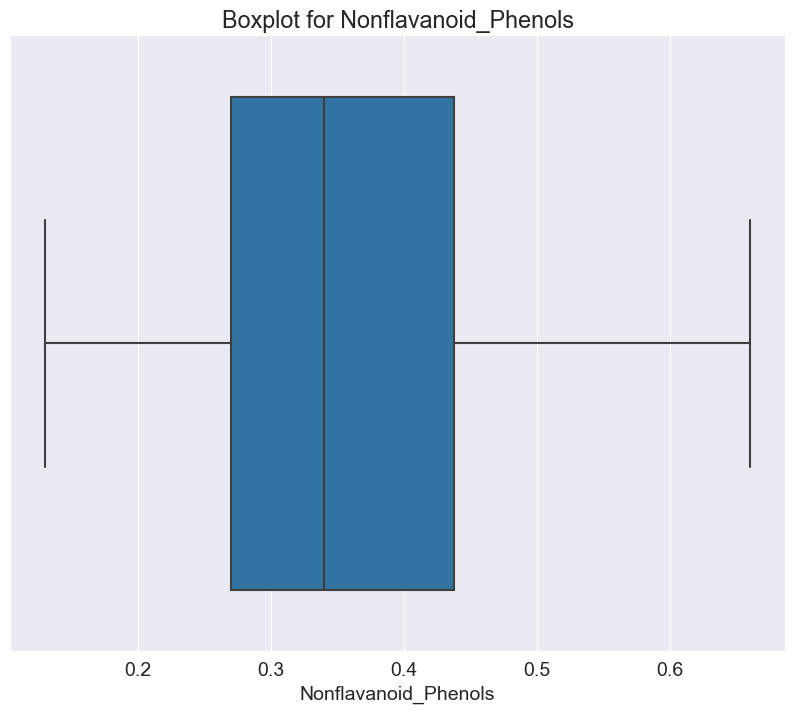

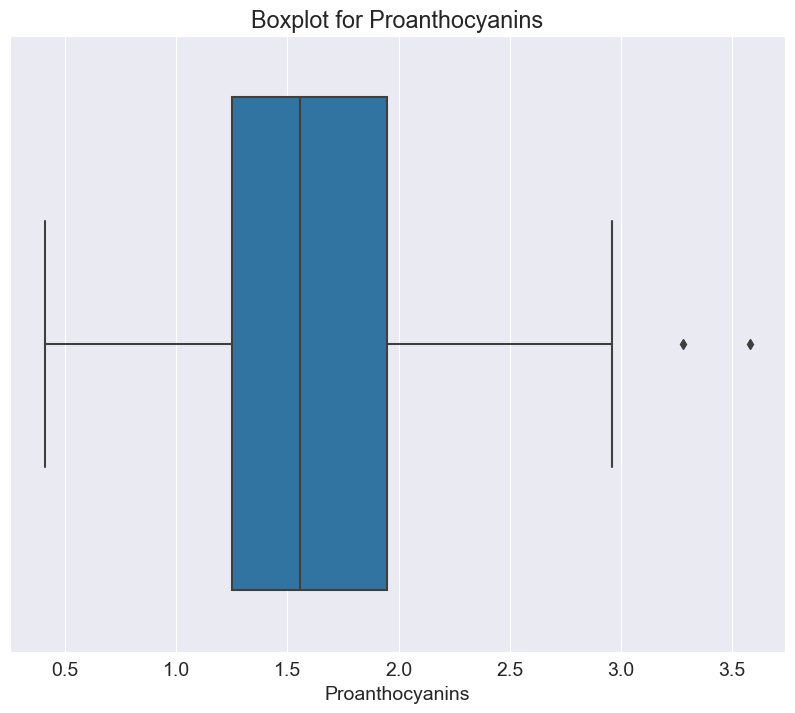

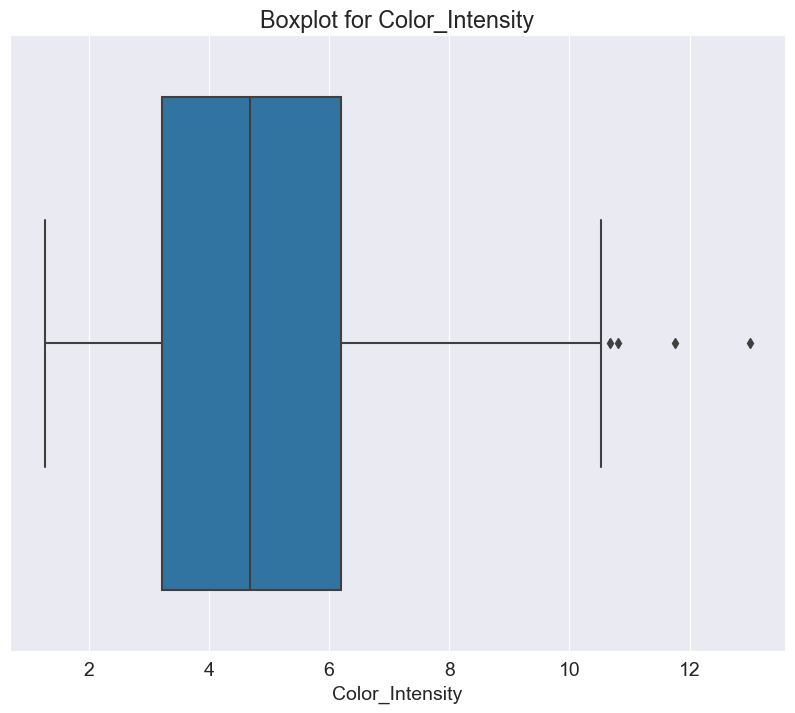

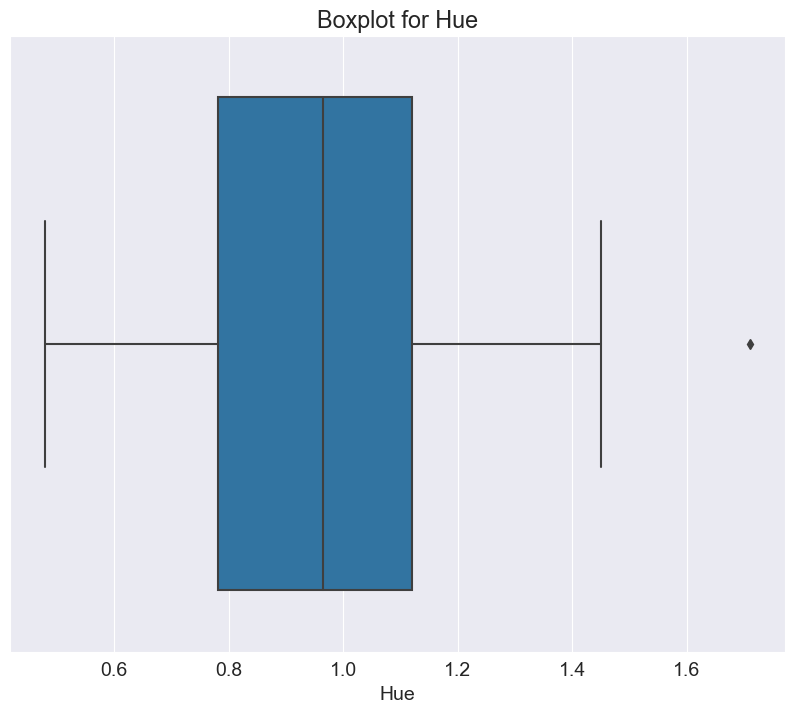

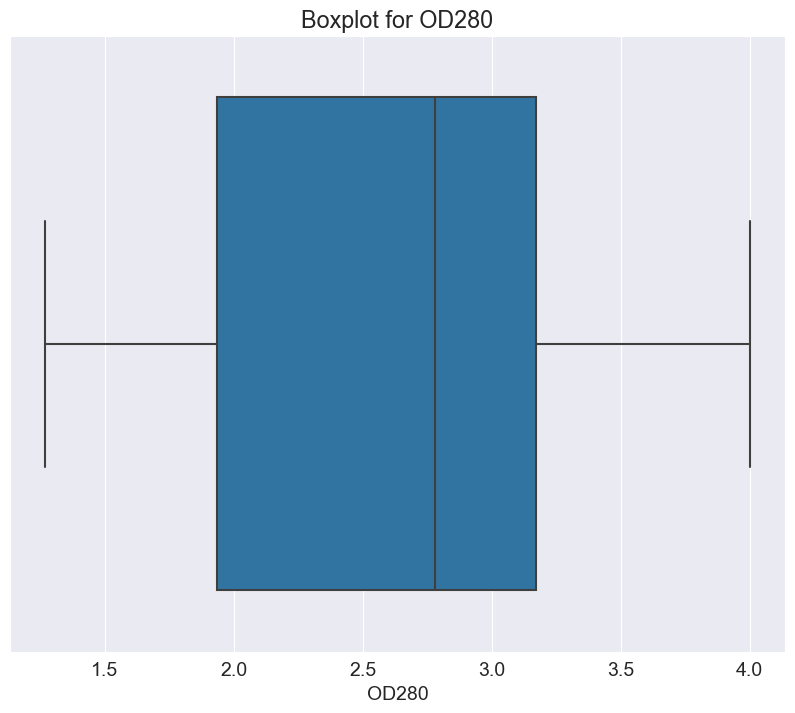

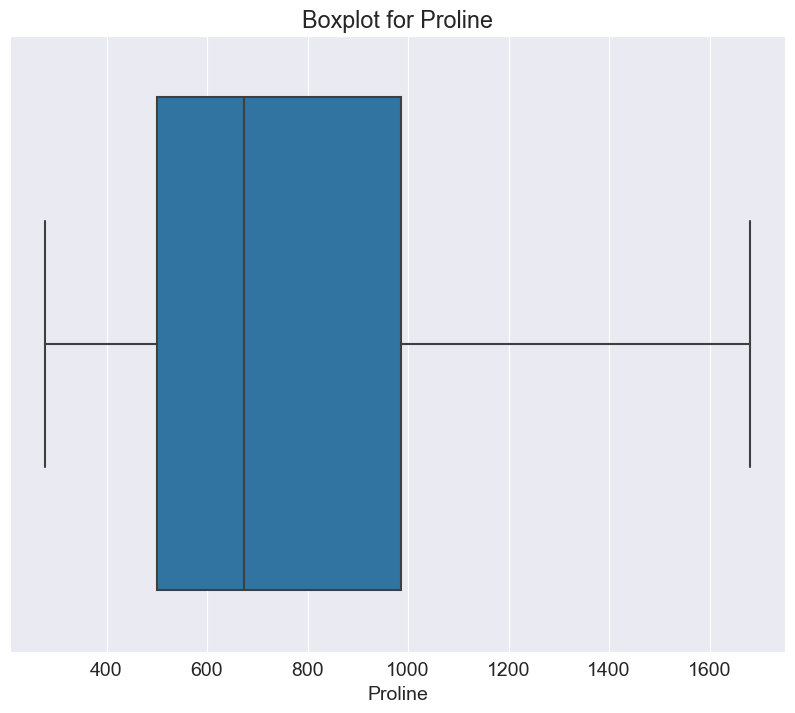

In [175]:

# Boxplot for each feature
for column in wine_df.columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=wine_df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

Observation drawn are:

In this dataset Malic_Acid, Ash, Ash_Alcanity, Magnesium,Proanthocyanins, Color_Intensity, Hue have some outliers or noise.

Alcohol and Color_Intensity Interquartile range (IQR) is symmetrically distributed around the median, meaning data is equally dispersed on both sides of the median.

Malic_Acid, Nonflavanoid_Phenols, Proline, Ash, Proanthocyanins box more dispersed towards Q3 could be an indication of positive skewness, meaning that the tail of the distribution is extending towards higher values. Suggest the presence of outliers on the higher side which is true for some parameters.

Ash_Alcanity, Total_Phenols, Flavanoids, Magnesium, Hue, OD280 have box more dispersed towards Q1 could be an indication of negative skewness, meaning that the tail of the distribution is extending towards lower values.

In [176]:
wine_cols = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
X= wine_df[wine_cols]
X

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

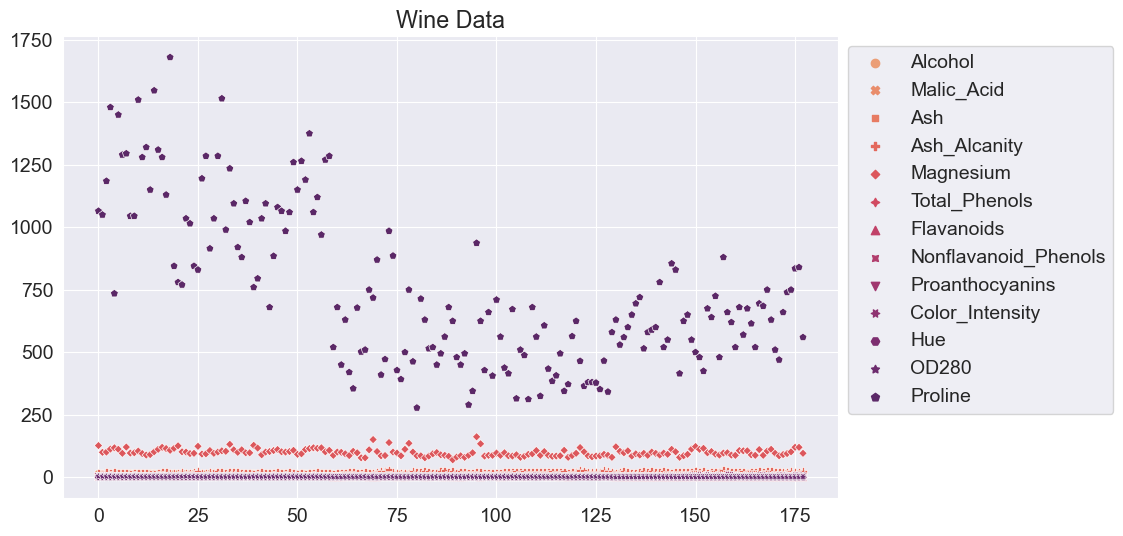

In [216]:
#Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data= wine_df,palette='flare')
plt.title('Wine Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Data Standardization using Z - Score normlization

A preprocessing step in which the features of a dataset are scaled or transformed to have a mean of 0 and a standard deviation of 1.

In Wine data, data is not standardized. Proline feature values are all above 250, some feature values are very small. As some Algorithms are sensitive to scale of input features(such as K-Means, Support Vector Machines (SVM), and Principal Component Analysis (PCA)), we need to standardize data.

In [179]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(wine_df)

In [180]:
from sklearn.model_selection import train_test_split
X_train, test = train_test_split(X_standardized, test_size=0.4,random_state=42 )
X_val, X_test = train_test_split(test, test_size= 0.5, random_state=42)

In [181]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(106, 13)
(36, 13)
(36, 13)


# Silhouette Coefficient:

Silhouette Score = (b-a)/max(a,b)

Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [182]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

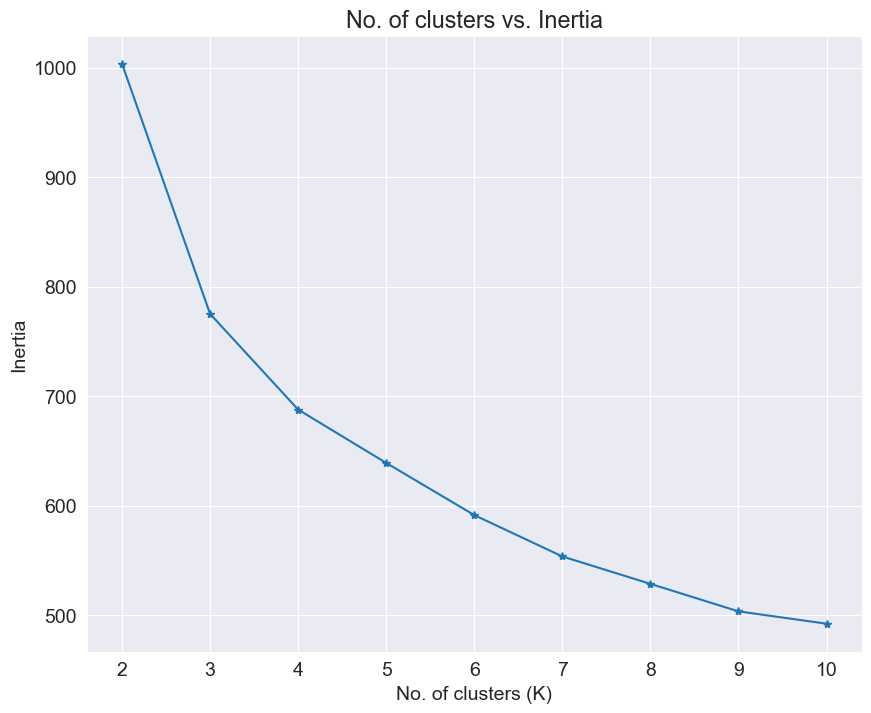

In [217]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X_train)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-*')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

The chart is creates an "elbow" plot, and you can pick the number of clusters beyond which the reduction in inertia decreases sharply.

In [184]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [185]:
model.cluster_centers_

array([[-0.99515166, -0.22427962, -0.36011269,  0.33033036, -0.58217904,
        -0.1343753 , -0.01884412,  0.01124924,  0.02339229, -0.91730353,
         0.40012776,  0.26033384, -0.77755229],
       [ 0.84062854, -0.2832048 ,  0.37826618, -0.62393245,  0.72027843,
         1.03973314,  1.09132794, -0.49380253,  0.65370456,  0.24009926,
         0.45368463,  0.82732874,  1.0477654 ],
       [ 0.13272494,  0.86242848,  0.26742681,  0.58077773,  0.04532438,
        -0.95305043, -1.17844187,  0.75445189, -0.82618483,  0.89094365,
        -1.10687356, -1.38384072, -0.39381823]])

In [219]:
preds = model.predict(X_train)
preds

array([2, 9, 6, 8, 0, 6, 8, 5, 0, 3, 7, 0, 4, 7, 7, 3, 2, 8, 8, 0, 2, 5,
       8, 6, 6, 0, 8, 6, 1, 5, 7, 7, 8, 3, 6, 2, 1, 5, 5, 5, 9, 9, 6, 9,
       6, 9, 7, 2, 5, 7, 0, 7, 8, 0, 5, 6, 8, 5, 6, 1, 6, 5, 0, 9, 2, 3,
       3, 7, 2, 6, 5, 1, 3, 8, 0, 5, 9, 1, 9, 9, 5, 7, 9, 1, 5, 7, 6, 1,
       0, 9, 1, 3, 1, 2, 8, 2, 5, 8, 4, 1, 0, 7, 2, 9, 5, 8])

In [189]:
X_train

array([[-1.65601842, -0.40964706, -1.63217132, ...,  1.19577163,
        -0.66622864, -1.01551358],
       [ 1.3580281 , -0.15830138, -0.24314178, ...,  1.28351841,
         0.78858745,  2.43010864],
       [-0.16134781,  2.04097332,  0.41481959, ..., -1.83149208,
        -1.06171263, -0.38816832],
       ...,
       [ 1.70390229, -0.4186237 ,  0.0492855 , ...,  1.06415147,
         0.54847218,  2.54793491],
       [-0.38369551, -0.72382916, -0.38935541, ...,  0.01119018,
        -0.77922407, -0.8021525 ],
       [-0.81603824,  0.10202093,  0.34171277, ..., -0.69078402,
         1.08520045, -0.98366865]])

In [190]:
k_means = KMeans(n_clusters=3, n_init=5)

labels_train = k_means.fit_predict(X_train)
train_kmeans_avg = silhouette_score(X_train, labels_train)

labels_validation = k_means.predict(X_val)
val_kmeans_avg = silhouette_score(X_val, labels_validation)

labels_test = k_means.predict(X_test)
test_kmeans_avg = silhouette_score(X_test, labels_test)

results = []
results.append({'Model Name' : 'Kmeans',
                'Training Set ': train_kmeans_avg,
                'Validation Set' : val_kmeans_avg,
                'Testing Set': test_kmeans_avg})

In [192]:
results

[{'Model Name': 'Kmeans',
  'Training Set ': 0.28293464102955523,
  'Validation Set': 0.26897452670931055,
  'Testing Set': 0.2770212863470136}]

In [193]:
print(f'Silhouette Score on Training Set: {train_kmeans_avg}')

Silhouette Score on Training Set: 0.28293464102955523


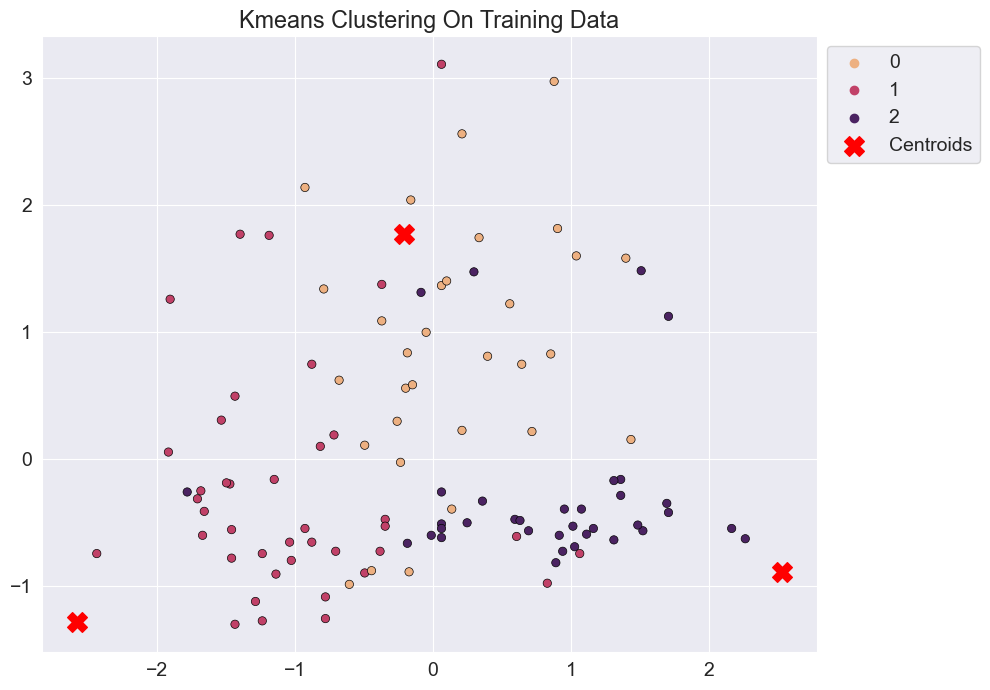

In [233]:
sns.scatterplot(x=X_train[:,0], y= X_train[:,1], data= X_train, hue=labels_train,palette='flare',edgecolor='k')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Kmeans Clustering On Training Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [195]:
k_means.inertia_

775.3607231611013

In [196]:
# with n_cluster=2
model = KMeans(n_clusters=2, random_state=42)
model.fit(X_train)

KMeans(n_clusters=2, random_state=42)

In [197]:
model.inertia_

1003.5241454447056

model.inertia_ is almost double for 2 clusters than 3 clusters. So, we can go with 3 clusters.

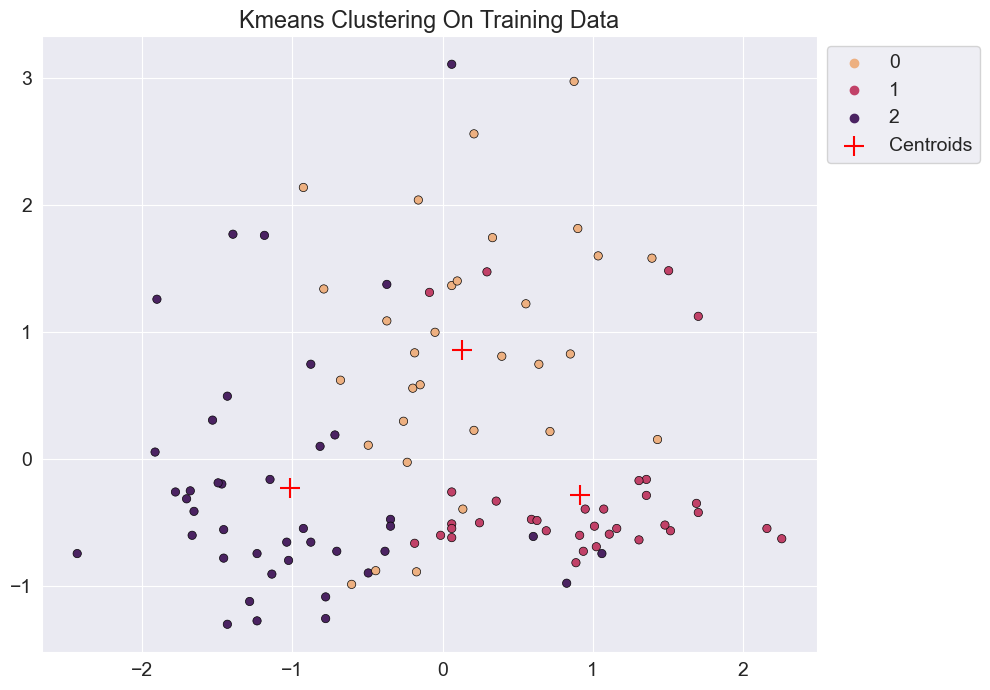

In [202]:
sns.scatterplot(x=X_train[:,0], y= X_train[:,1], data= X_train, hue=labels_train,palette='flare',edgecolor='k')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='+', s=200, label='Centroids')
plt.title('Kmeans Clustering On Training Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Hierarchical Clustering

Agglomerative Clustering

In [203]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

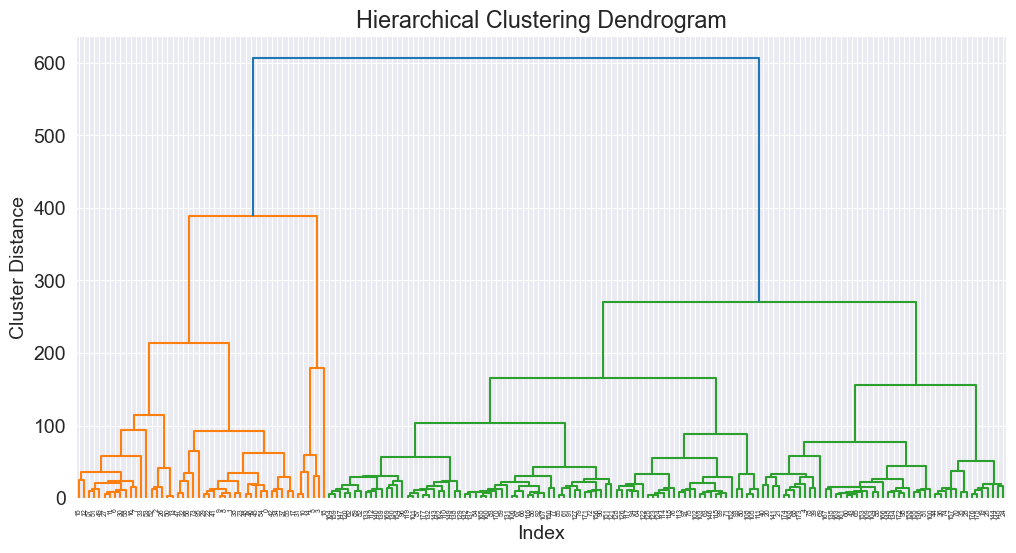

In [205]:
# Hierarchical clustering

plt.figure(figsize=(12,6))
linked = linkage(wine_df, method='centroid')
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Cluster Distance")
plt.show()

In [206]:
algo = AgglomerativeClustering(n_clusters=3)

labels_train_algo = model.fit_predict(X_train)
train_algo_avg = silhouette_score(X_train, labels_train_algo)
 
labels_validation_algo = model.fit_predict(X_val)
val_algo_avg = silhouette_score(X_val, labels_validation_algo)

labels_test_algo = model.fit_predict(X_test)
test_algo_avg = silhouette_score(X_test, labels_test_algo)

results.append({'Model Name' : 'Agglomerative Clustering',
                'Training Set ': train_algo_avg,
                'Validation Set' : val_algo_avg,
                'Testing Set': test_algo_avg})

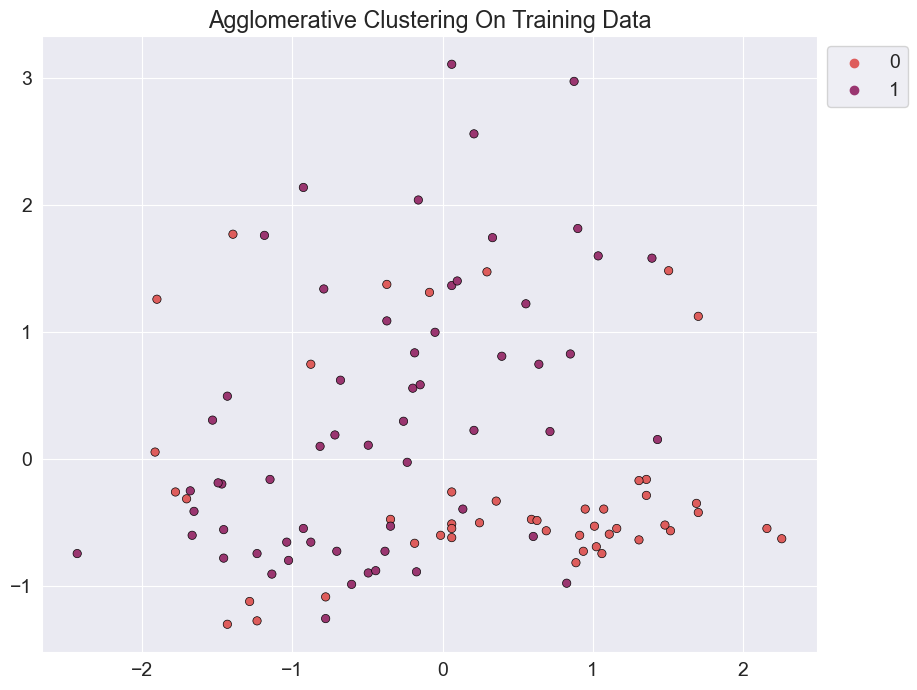

In [207]:
sns.scatterplot(x=X_train[:,0], y= X_train[:,1], data= X_train, hue=labels_train_algo,palette='flare',edgecolor='k')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Agglomerative Clustering On Training Data')
plt.show()

In [208]:
print(f'Silhouette Score on Training Set: {train_algo_avg}')

Silhouette Score on Training Set: 0.26591895153291645


# Dimensionality Reduction and Manifold Learning

Principal Component Analysis (PCA)

In [209]:
from sklearn.decomposition import PCA

In [210]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.fit_transform(X_val)
X_test_pca = pca.fit_transform(X_test)

In [211]:
# Apply K-Means clustering on the PCA-transformed data
k_means_pca = KMeans(n_clusters=3, random_state=42,n_init=10)

labels_train = k_means.fit_predict(X_train_pca)
train_pca_avg = silhouette_score(X_train_pca, labels_train)

labels_val = k_means.predict(X_val_pca)
val_pca_avg = silhouette_score(X_val_pca, labels_val)

labels_test = k_means.predict(X_test_pca)
test_pca_avg = silhouette_score(X_test_pca, labels_test)

In [212]:
results.append({'Model Name' : 'PCA with Kmeans',
                'Training Set ': train_pca_avg,
                'Validation Set' : val_pca_avg,
                 'Testing Set': test_pca_avg})

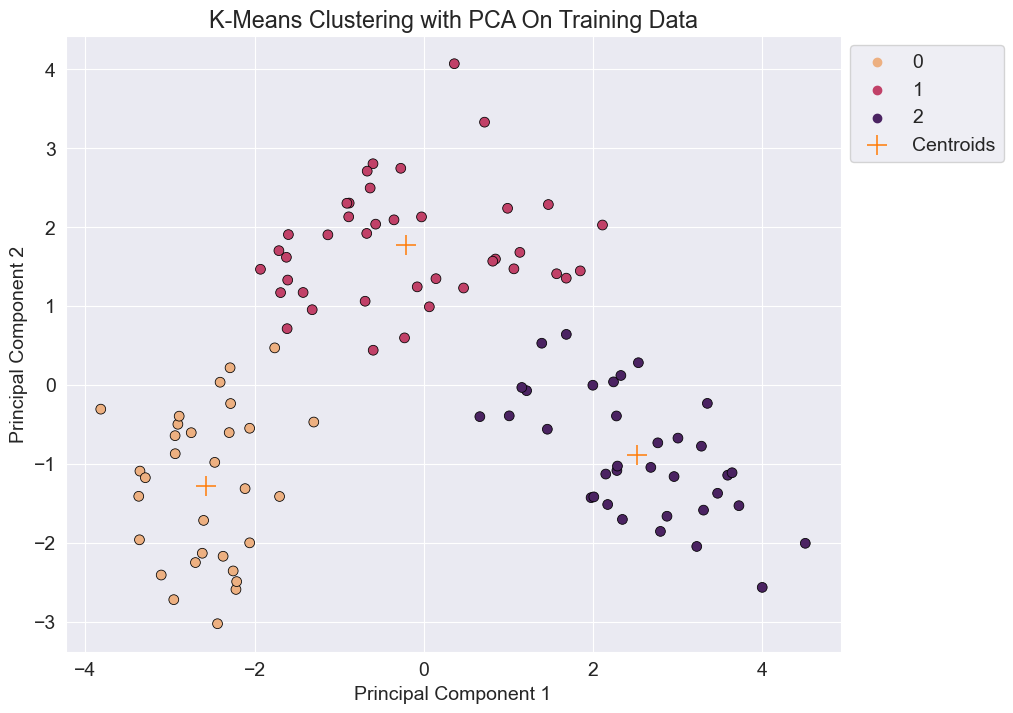

In [213]:
# Visualize the clustering result
sns.scatterplot(x= X_train_pca[:, 0], y=X_train_pca[:, 1], data=X_train_pca, hue=labels_train, marker='o', s=50,palette='flare',edgecolor='k')
sns.scatterplot(x= k_means.cluster_centers_[:, 0], y= k_means.cluster_centers_[:, 1], marker='+', s=200, label='Centroids')
plt.title('K-Means Clustering with PCA On Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [214]:
results_df = pd.DataFrame(results)
results_df

Model Name  Training Set   Validation Set  Testing Set
0                    Kmeans       0.282935        0.268975     0.277021
1  Agglomerative Clustering       0.265919        0.309994     0.266664
2           PCA with Kmeans       0.560373        0.457323     0.201893